# Topic 1 : Forecast the price of Avocado in the US

### Business Objective/ Problem
* Bơ "Hass", một công ty có trụ sở tại Mexico, chuyên sản xuất nhiều loại bơ được bán ở Mỹ. Họ đã rất thành công trong những năm gần đây và muốn mở rộng. Vì vậy, họ muốn xây dựng mô hình hợp lý để dự đoán giá thành trung bình của bơ "Hass" ở Mỹ nhẵm xem xét việc mở rộng các loại trang trại Bơ đang có cho việc trồng bơ ở các vùng khác

## Triển khai dự án

## Bước 1: Business Understanding
### Dựa vào mô tả nói trên ==> Xác định được vấn đề
* Hiện tại: Công ty kinh doanh quả bơ ở rất nhiều vùng của nước Mỹ với 2 loại bơ thường và bơ hữu cơ, được đóng gói theo nhiều quy chuẩn(Small/Large/XLargeBags), và có 3 PLU( Product Look Up) khác nhau (4046,4225,4770). Nhưng họ chưa có mô hình để dự đoán giá bơ cho việc mở rộng.
* ==> Mục tiêu/ Vấn đề: Xây dụng mô hình dự đoán giá trung bình của bơ "Hass" ở Mỹ ==> Xem xét việc mở rộng sản xuất, kinh doanh

## Bước 2: Data Understanding/ Acquire
### Từ mục tiêu/ vấn đề đã xác định: xem xét các dữ liệu mà công ty đang có:
* Dữ liệu được lấy trực tiếp từ máy tính tiền của các nhà bán lẻ dựa tên doang số bán lẻ thực tế của bơ Hass.
* Dữ liệu đại diện cho dữ liệu lấy từ máy quét bán lẻ hàng tuần cho lượng bán lẻ(National Retail volume units) và giá bơ từ tháng 4/2015 - 3/2018
* Giá trung bình (Average Price) trong bảng phản ánh giá trên một đơn vị ( mỗi quả bơ), ngay cả khi nhiều đơn vị (bơ) được bán trong bao.
* Mã tra cứu sản phẩm - Product Lookup codes (PLU's) trong bảng chỉ dành cho bơ Hass, không dành cho các sản phẩm khác 

### Toàn bộ dữ liệu được đổ ra và lưu trữ trong tập tin avocado.csv , với các cột:
* Date: ngày ghi nhận
* AveragePrice: giá trung bình của một quả bơ
* Type - conventional/ organic: loại thông thường/ hữu cơ
* Region: vùng được bán
* Total Volume: tổng số bơ đã bán
* 4046: tổng số bơ có mã PLU 4046 đã bán
* 4225: tổng số bơ có mã PLU 4225 đã bán
* 4770: tổng số bơ có mã PLU 4770 đã bán
* Total Bags: tổng số túi đã bán
* Small/ Large/ XLargeBags: tổng số túi đã bán theo size


Có hai loại bơ trong tập dữ liệu và một số vùng khác nhau. Điều này cho phép thực hiện tất cả các loại phân tích cho các vùng khác nhau, hoặc phân tích toàn bộ nước Mỹ theo một trong hai loại bơ.

### ==> Có thể tập trung giải quyết hai bài toán 
* Bài toán 1: USA's Avocado Average Price Prediction - Sử dụng các thuật toán Regression như Linear Regression, Random Forest, XGB Regressor
* Bài toán 2: Conventional/ Organic Avocado Average Price Prediction for future in California/ New York...., sử dụng các thuật toán Time Series như ARIMA,Prophet

## Bước 3: Data preparation/ Prepare

In [2]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
import pandas_profiling as pp

from sklearn.preprocessing import LabelEncoder,OneHotEncoder

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from math import sqrt

from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima

from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot


from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import math
from datetime import datetime

Importing plotly failed. Interactive plots will not work.


In [3]:
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)

In [4]:
# Configure pandas display
pd.options.display.float_format = '{:.2f}'.format

In [5]:
data = pd.read_csv('avocado.csv')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [7]:
data = data.loc[:,~data.columns.str.contains('^Unnamed')]

In [8]:
data.head(2)

Date  AveragePrice  Total Volume    4046     4225  ...  Large Bags  XLarge Bags          type  year  region
0  2015-12-27          1.33      64236.62 1036.74 54454.85  ...       93.25         0.00  conventional  2015  Albany
1  2015-12-20          1.35      54876.98  674.28 44638.81  ...       97.49         0.00  conventional  2015  Albany

[2 rows x 13 columns]

## Bài toán 1: Organic Avocado's Price Prediction
### Linear Regression, Random Forest, XGB Regressor,....

### Bước 3: Data preparation

In [9]:
# Tìm thuật toán tốt hơn

In [10]:
df = data.copy(deep=True)

### First EDA => Check data

In [12]:
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### From pandas_profiling we can see:
* No missing cells
* No duplicate rows

In [11]:
# Check again
df.isnull().any()

Date            False
AveragePrice    False
Total Volume    False
4046            False
4225            False
4770            False
Total Bags      False
Small Bags      False
Large Bags      False
XLarge Bags     False
type            False
year            False
region          False
dtype: bool

In [12]:
df.isna().any()

Date            False
AveragePrice    False
Total Volume    False
4046            False
4225            False
4770            False
Total Bags      False
Small Bags      False
Large Bags      False
XLarge Bags     False
type            False
year            False
region          False
dtype: bool

#### Liệu thuộc tính 'type' có ảnh hưởng đến "AveragePrice" hay không ?

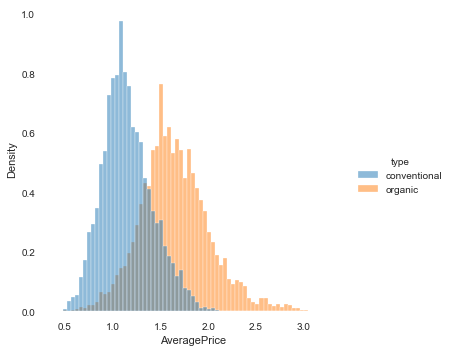

In [13]:
# AveragePrice Distribution of 2 types of Avocados
sb.displot(df,x='AveragePrice',hue = 'type',stat = "density")
plt.show()

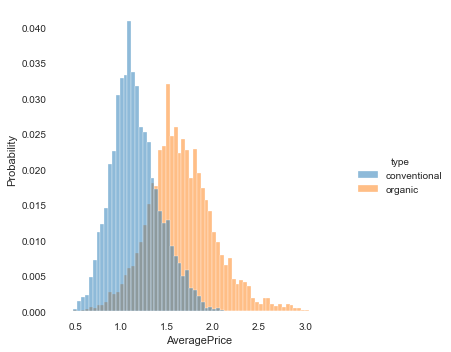

In [14]:
sb.displot(df,x='AveragePrice',hue = 'type',stat = "probability")
plt.show()

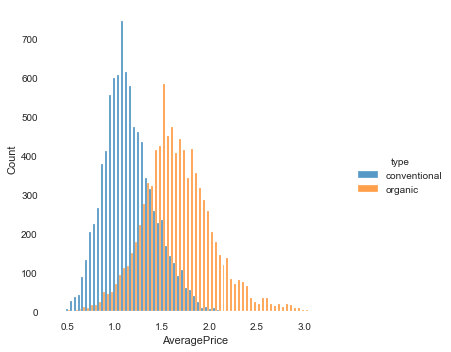

In [15]:
sb.displot(df,x='AveragePrice',hue = 'type',multiple = "dodge")
plt.show()

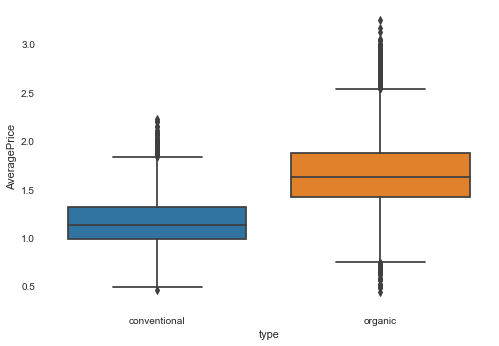

In [16]:
sb.boxplot(data = df,x = 'type',y = 'AveragePrice')
plt.show()

#### Nhận xét : 
* Loại bơ (type) có ảnh hưởng đến giá bơ (AveragePrice)
* Bơ Organic mắc hơn bơ truyền thống

####  Region có ảnh hưởng đến giá bơ "AveragePrice" không?

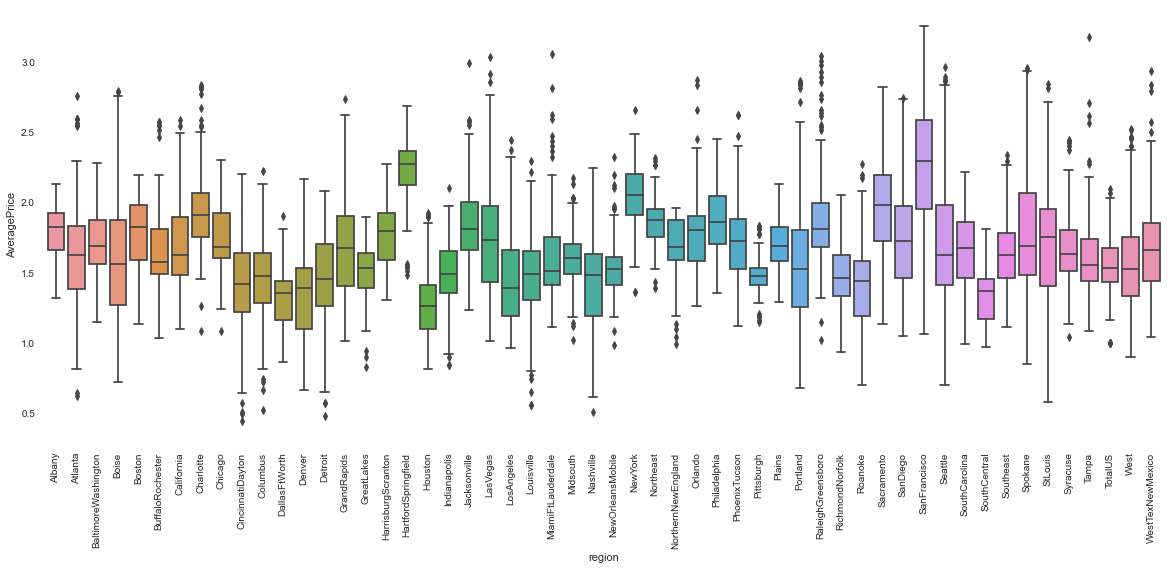

In [17]:
# type =='organic'
fig,ax = plt.subplots(figsize=(20,8))
sb.boxplot(data=df[df['type'] == 'organic'],x='region',y= 'AveragePrice',ax = ax)
plt.xticks(rotation = 90)
plt.show()

In [18]:
# Mỗi vùng có giá bán bơ riêng biệt 

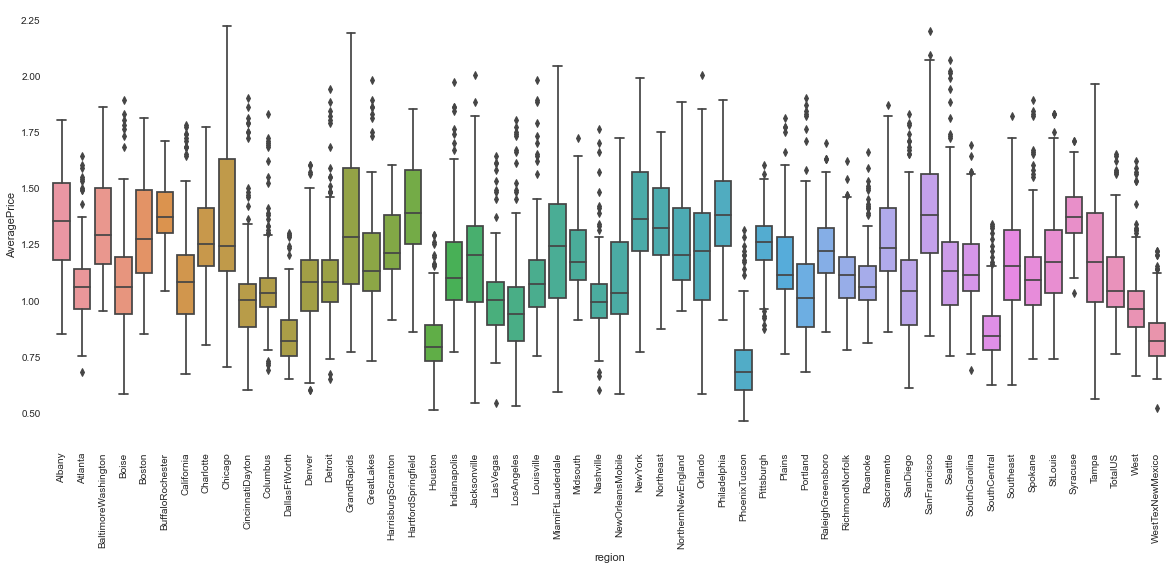

In [19]:
# type =='conventional'
fig,ax = plt.subplots(figsize=(20,8))
sb.boxplot(data=df[df['type'] == 'conventional'],x='region',y= 'AveragePrice',ax = ax)
plt.xticks(rotation = 90)
plt.show()

#### Nhận xét:
* "AveragePrice" bị ảnh hưởng bởi "region" cả loại organic và loại conventional

#### Các thuộc tính liên tục các ảnh hưởng đến 'AveragePrice' không?

In [20]:
corr = df.corr()
corr

AveragePrice  Total Volume  4046  4225  4770  Total Bags  Small Bags  Large Bags  XLarge Bags  year
AveragePrice          1.00         -0.19 -0.21 -0.17 -0.18       -0.18       -0.17       -0.17        -0.12  0.09
Total Volume         -0.19          1.00  0.98  0.97  0.87        0.96        0.97        0.88         0.75  0.02
4046                 -0.21          0.98  1.00  0.93  0.83        0.92        0.93        0.84         0.70  0.00
4225                 -0.17          0.97  0.93  1.00  0.89        0.91        0.92        0.81         0.69 -0.01
4770                 -0.18          0.87  0.83  0.89  1.00        0.79        0.80        0.70         0.68 -0.04
Total Bags           -0.18          0.96  0.92  0.91  0.79        1.00        0.99        0.94         0.80  0.07
Small Bags           -0.17          0.97  0.93  0.92  0.80        0.99        1.00        0.90         0.81  0.06
Large Bags           -0.17          0.88  0.84  0.81  0.70        0.94        0.90        1.00         0.71  0.09
XLarge Bags          -0.12          0.75  0.70  0.69  0.68        0.80        0.81        0.71         1.00  0.08
year                  0.09          0.02  0.00 -0.01 -0.04        0.07        0.06        0.09         0.08  1.00

#### Nhận xét:
* Vì correlation của các biến không cao, nên model Linear Regression có khả năng cao cho model hiệu suất thấp

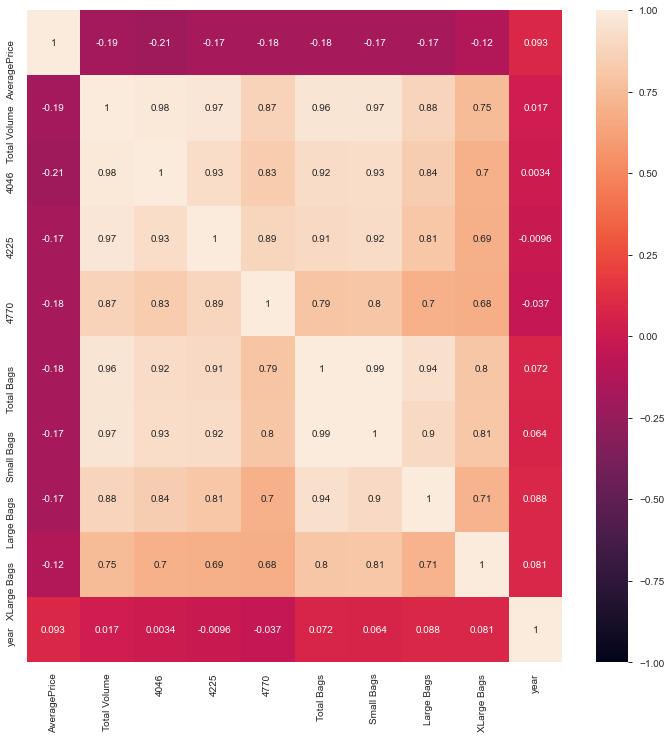

In [21]:
fig,ax = plt.subplots(figsize = (12,12))
sb.heatmap(corr,vmin=-1,vmax=1,annot=True)
plt.show()

#### Mùa có ảnh hưởng đến giá bơ hay không? ==> Biến đổi feature Date thành mùa

#### Feature Engineering
_ Các tháng mùa xuân của Mỹ là : 3,4,5
_ Các tháng mùa hè của Mỹ là : 6,7,8
_ Các tháng mùa thu của Mỹ là : 9,10,11
_ Các tháng mùa đông của Mỹ là : 12,1,2

In [22]:
def convert_month(month):
    if month in [3,4,5]:
        return 0
    elif month in [6,7,8]:
        return 1
    elif month in [9,10,11]:
        return 2
    else:
        return 3

In [23]:
df['Date'] = pd.to_datetime(df['Date'])

In [24]:
df['Month'] = pd.DatetimeIndex(df['Date']).month

In [25]:
df['Season'] = df['Month'].apply(lambda x :convert_month(x))

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
 13  Month         18249 non-null  int64         
 14  Season        18249 non-null  int64         
dtypes: datetime64[ns](1), float64(9), in

In [27]:
df.head(20)

Date  AveragePrice  Total Volume    4046      4225  ...          type  year  region  Month  Season
0  2015-12-27          1.33      64236.62 1036.74  54454.85  ...  conventional  2015  Albany     12       3
1  2015-12-20          1.35      54876.98  674.28  44638.81  ...  conventional  2015  Albany     12       3
2  2015-12-13          0.93     118220.22  794.70 109149.67  ...  conventional  2015  Albany     12       3
3  2015-12-06          1.08      78992.15 1132.00  71976.41  ...  conventional  2015  Albany     12       3
4  2015-11-29          1.28      51039.60  941.48  43838.39  ...  conventional  2015  Albany     11       2
5  2015-11-22          1.26      55979.78 1184.27  48067.99  ...  conventional  2015  Albany     11       2
6  2015-11-15          0.99      83453.76 1368.92  73672.72  ...  conventional  2015  Albany     11       2
7  2015-11-08          0.98     109428.33  703.75 101815.36  ...  conventional  2015  Albany     11       2
8  2015-11-01          1.02      99811.42 1022.15  87315.57  ...  conventional  2015  Albany     11       2
9  2015-10-25          1.07      74338.76  842.40  64757.44  ...  conventional  2015  Albany     10       2
10 2015-10-18          1.12      84843.44  924.86  75595.85  ...  conventional  2015  Albany     10       2
11 2015-10-11          1.28      64489.17 1582.03  52677.92  ...  conventional  2015  Albany     10       2
12 2015-10-04          1.31      61007.10 2268.32  49880.67  ...  conventional  2015  Albany     10       2
13 2015-09-27          0.99     106803.39 1204.88  99409.21  ...  conventional  2015  Albany      9       2
14 2015-09-20          1.33      69759.01 1028.03  59313.12  ...  conventional  2015  Albany      9       2
15 2015-09-13          1.28      76111.27  985.73  65696.86  ...  conventional  2015  Albany      9       2
16 2015-09-06          1.11      99172.96  879.45  90062.62  ...  conventional  2015  Albany      9       2
17 2015-08-30          1.07     105693.84  689.01  94362.67  ...  conventional  2015  Albany      8       1
18 2015-08-23          1.34      79992.09  733.16  67933.79  ...  conventional  2015  Albany      8       1
19 2015-08-16          1.33      80043.78  539.65  68666.01  ...  conventional  2015  Albany      8       1

[20 rows x 15 columns]

#### Mùa khác nhau có ảnh hưởng đến giá bơ không?

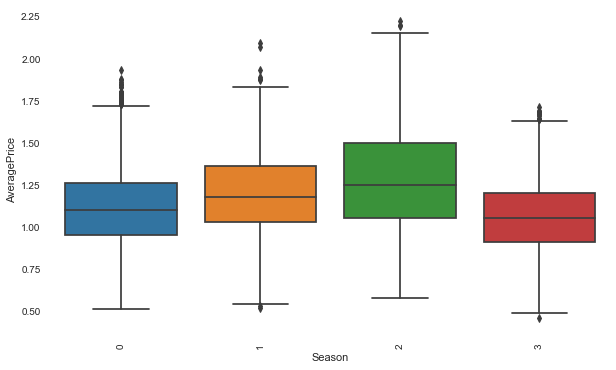

In [28]:
# type = conventional
fig,ax = plt.subplots(figsize =(10,6))
sb.boxplot(data=df[df['type'] =='conventional'],x='Season',y='AveragePrice',ax=ax)
plt.xticks(rotation = 90)
plt.show()

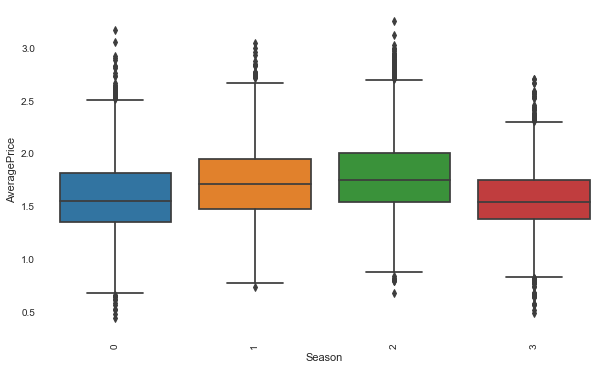

In [29]:
# type = organic
fig,ax = plt.subplots(figsize =(10,6))
sb.boxplot(data=df[df['type'] =='organic'],x='Season',y='AveragePrice',ax=ax)
plt.xticks(rotation = 90)
plt.show()

#### Nhận xét:
* Mùa(Season) có ảnh hưởng đến giá bơ('AveragePrice')

#### Label Encoder and Onehot Encoder for 'type' and 'region'

In [30]:
le = LabelEncoder()
df['type_new'] = le.fit_transform(df['type'])

In [31]:
df.head()

Date  AveragePrice  Total Volume    4046      4225   4770  ...          type  year  region  Month Season  type_new
0 2015-12-27          1.33      64236.62 1036.74  54454.85  48.16  ...  conventional  2015  Albany     12      3         0
1 2015-12-20          1.35      54876.98  674.28  44638.81  58.33  ...  conventional  2015  Albany     12      3         0
2 2015-12-13          0.93     118220.22  794.70 109149.67 130.50  ...  conventional  2015  Albany     12      3         0
3 2015-12-06          1.08      78992.15 1132.00  71976.41  72.58  ...  conventional  2015  Albany     12      3         0
4 2015-11-29          1.28      51039.60  941.48  43838.39  75.78  ...  conventional  2015  Albany     11      2         0

[5 rows x 16 columns]

In [32]:
df_one = pd.get_dummies(data = df,columns=['region'])
df_one.head()

Date  AveragePrice  Total Volume    4046  ...  region_Tampa  region_TotalUS  region_West  region_WestTexNewMexico
0 2015-12-27          1.33      64236.62 1036.74  ...             0               0            0                        0
1 2015-12-20          1.35      54876.98  674.28  ...             0               0            0                        0
2 2015-12-13          0.93     118220.22  794.70  ...             0               0            0                        0
3 2015-12-06          1.08      78992.15 1132.00  ...             0               0            0                        0
4 2015-11-29          1.28      51039.60  941.48  ...             0               0            0                        0

[5 rows x 69 columns]

In [33]:
df_one.shape

(18249, 69)

In [34]:
df_one.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'Month', 'Season', 'type_new', 'region_Albany', 'region_Atlanta',
       'region_BaltimoreWashington', 'region_Boise', 'region_Boston',
       'region_BuffaloRochester', 'region_California', 'region_Charlotte',
       'region_Chicago', 'region_CincinnatiDayton', 'region_Columbus',
       'region_DallasFtWorth', 'region_Denver', 'region_Detroit',
       'region_GrandRapids', 'region_GreatLakes', 'region_HarrisburgScranton',
       'region_HartfordSpringfield', 'region_Houston', 'region_Indianapolis',
       'region_Jacksonville', 'region_LasVegas', 'region_LosAngeles',
       'region_Louisville', 'region_MiamiFtLauderdale', 'region_Midsouth',
       'region_Nashville', 'region_NewOrleansMobile', 'region_NewYork',
       'region_Northeast', 'region_NorthernNewEngland', 'region_Orlando',
       'region_Philadelphia', 'region_PhoenixT

In [35]:
# Choose TotalVolume because it has high corr with '4046','4225','Small Bags','Large Bags','XLarge Bags'
X = df_one.drop(['Date','AveragePrice','type','4046','4225','4770','Small Bags','Large Bags','XLarge Bags'],axis = 1)
y = df['AveragePrice']

In [36]:
X.head()

Total Volume  Total Bags  year  Month  ...  region_Tampa  region_TotalUS  region_West  region_WestTexNewMexico
0      64236.62     8696.87  2015     12  ...             0               0            0                        0
1      54876.98     9505.56  2015     12  ...             0               0            0                        0
2     118220.22     8145.35  2015     12  ...             0               0            0                        0
3      78992.15     5811.16  2015     12  ...             0               0            0                        0
4      51039.60     6183.95  2015     11  ...             0               0            0                        0

[5 rows x 60 columns]

## Lazy Prediction

In [39]:
clf = LazyRegressor(verbose=0,ignore_warnings=True,custom_metric=None)
models,prediction = clf.fit(X_train,X_test,y_train,y_test)

 60%|████████████████████████████████████████████████▊                                 | 25/42 [04:17<00:31,  1.82s/it]c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [07:55<00:00, 11.32s/it]


In [40]:
models

Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
ExtraTreesRegressor                          0.91       0.91  0.12       37.66
RandomForestRegressor                        0.90       0.90  0.13       30.73
XGBRegressor                                 0.89       0.89  0.13        4.03
BaggingRegressor                             0.88       0.89  0.14        3.29
LGBMRegressor                                0.86       0.86  0.15        0.94
HistGradientBoostingRegressor                0.85       0.86  0.15        7.54
ExtraTreeRegressor                           0.85       0.85  0.15        0.56
KNeighborsRegressor                          0.83       0.83  0.17       12.19
DecisionTreeRegressor                        0.82       0.83  0.17        0.66
MLPRegressor                                 0.80       0.80  0.18       49.06
SVR                                          0.71       0.71  0.22       46.46
NuSVR                                        0.71       0.71  0.22       75.34
GradientBoostingRegressor                    0.70       0.70  0.22        8.37
LarsCV                                       0.58       0.58  0.26        0.86
LassoLarsCV                                  0.58       0.58  0.26        0.81
LassoCV                                      0.58       0.58  0.26        2.10
LassoLarsIC                                  0.58       0.58  0.26        0.25
ElasticNetCV                                 0.58       0.58  0.26        2.65
Lars                                         0.58       0.58  0.26        0.30
Ridge                                        0.58       0.58  0.26        0.16
RidgeCV                                      0.58       0.58  0.26        0.37
TransformedTargetRegressor                   0.58       0.58  0.26        0.33
LinearRegression                             0.58       0.58  0.26        0.29
BayesianRidge                                0.58       0.58  0.26        0.38
SGDRegressor                                 0.57       0.58  0.26        0.22
HuberRegressor                               0.57       0.57  0.26        0.49
LinearSVR                                    0.56       0.56  0.27        6.62
AdaBoostRegressor                            0.49       0.49  0.29        5.99
PoissonRegressor                             0.48       0.48  0.29        0.21
OrthogonalMatchingPursuit                    0.45       0.46  0.30        0.20
OrthogonalMatchingPursuitCV                  0.45       0.46  0.30        0.56
GeneralizedLinearRegressor                   0.43       0.44  0.30        0.40
TweedieRegressor                             0.43       0.44  0.30        0.20
GammaRegressor                               0.43       0.44  0.30        0.23
RANSACRegressor                              0.39       0.40  0.31        2.17
PassiveAggressiveRegressor                   0.19       0.20  0.36        0.29
Lasso                                       -0.01      -0.00  0.40        0.21
ElasticNet                                  -0.01      -0.00  0.40        0.22
DummyRegressor                              -0.01      -0.00  0.40        0.17
LassoLars                                   -0.01      -0.00  0.40        0.18
KernelRidge                                -11.80     -11.66  1.43       47.55
GaussianProcessRegressor                   -58.81     -58.15  3.09      123.89

## Bước 4,5:Modeling & Evaluation

In [37]:
from lazypredict.Supervised import LazyRegressor

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
 13  Month         18249 non-null  int64         
 14  Season        18249 non-null  int64         
 15  type_new      18249 non-null  int32 

In [39]:
df_num = df.select_dtypes(exclude=['datetime64','object'])

In [40]:
for col in df_num.columns:
    print(col)
    print(np.ptp(df[col]))

AveragePrice
2.81
Total Volume
62505561.96
4046
22743616.17
4225
20470572.61
4770
2546439.11
Total Bags
19373134.37
Small Bags
13384586.8
Large Bags
5719096.61
XLarge Bags
551693.65
year
3
Month
11
Season
3
type_new
1


#### Nhận xét: các thuộc tính chênh lệch với nhau khá lớn == > Phải scale dữ liệu

In [41]:
pipeline_LR = Pipeline([('scaler',StandardScaler()),('lr',LinearRegression())])
pipeline_LR.fit(X_train,y_train)
y_pred_LR = pipeline_LR.predict(X_test)
r2_score(y_test,y_pred_LR)

0.5819568171867497

In [42]:
mae_LR = mean_absolute_error(y_test,y_pred_LR)
mae_LR

0.19675351640868644

In [43]:
pipeline_RF = Pipeline([('scaler',StandardScaler()),('lr',RandomForestRegressor())])
pipeline_RF.fit(X_train,y_train)
y_pred_RF = pipeline_RF.predict(X_test)
r2_score(y_test,y_pred_RF)

0.8965389672161075

In [44]:
mae_RF = mean_absolute_error(y_test,y_pred_RF)
mae_RF

0.0888670319634703

In [45]:
pipeline_XGB = Pipeline([('scaler',StandardScaler()),('lr',XGBRegressor())])
pipeline_XGB.fit(X_train,y_train)
y_pred_XGB = pipeline_XGB.predict(X_test)
r2_score(y_test,y_pred_XGB)

0.8905047345394455

In [46]:
mae_XGB = mean_absolute_error(y_test,y_pred_RF)
mae_XGB

0.0888670319634703

#### Nhận xét:
* Chọn RandomForest vì nó có R^2 cao nhất và MAE thấp nhất 

### Chọn thêm các thuật toán khác:So sánh các thuật toán với nhau

#### Chọn K

In [39]:
scaler = StandardScaler()

In [40]:
scale = scaler.fit_transform(X)

In [41]:
X_scale = pd.DataFrame(scale,columns= X.columns)

In [42]:
X_scale.head()

Total Volume  Total Bags  year  Month  Season  type_new  region_Albany  \
0         -0.23       -0.23 -1.22   1.65    1.28     -1.00           7.28   
1         -0.23       -0.23 -1.22   1.65    1.28     -1.00           7.28   
2         -0.21       -0.23 -1.22   1.65    1.28     -1.00           7.28   
3         -0.22       -0.24 -1.22   1.65    1.28     -1.00           7.28   
4         -0.23       -0.24 -1.22   1.36    0.41     -1.00           7.28   

   region_Atlanta  region_BaltimoreWashington  region_Boise  ...  \
0           -0.14                       -0.14         -0.14  ...   
1           -0.14                       -0.14         -0.14  ...   
2           -0.14                       -0.14         -0.14  ...   
3           -0.14                       -0.14         -0.14  ...   
4           -0.14                       -0.14         -0.14  ...   

   region_SouthCarolina  region_SouthCentral  region_Southeast  \
0                 -0.14                -0.14             -0.14   
1                 -0.14                -0.14             -0.14   
2                 -0.14                -0.14             -0.14   
3                 -0.14                -0.14             -0.14   
4                 -0.14                -0.14             -0.14   

   region_Spokane  region_StLouis  region_Syracuse  region_Tampa  \
0           -0.14           -0.14            -0.14         -0.14   
1           -0.14           -0.14            -0.14         -0.14   
2           -0.14           -0.14            -0.14         -0.14   
3           -0.14           -0.14            -0.14         -0.14   
4           -0.14           -0.14            -0.14         -0.14   

   region_TotalUS  region_West  region_WestTexNewMexico  
0           -0.14        -0.14                    -0.14  
1           -0.14        -0.14                    -0.14  
2           -0.14        -0.14                    -0.14  
3           -0.14        -0.14                    -0.14  
4           -0.14        -0.14                    -0.14  

[5 rows x 60 columns]

In [43]:
X_train_scale,X_test_scale,y_train,y_test = train_test_split(X_scale,y,test_size=0.3,random_state=0)

In [57]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,accuracy_score
from sklearn.model_selection import train_test_split
import math
import matplotlib.pyplot as plt 
import seaborn as sb
def k_select(X_scale,y):
    list_k = []
    list_score_test = []
    list_error = []
    abs_train_test = []
    X_train,X_test,y_train,y_test = train_test_split(X_scale,y,random_state=42)
    for k_value in range(2,11):
        list_k.append(k_value)

        model = KNeighborsRegressor(n_neighbors=k_value)
        model.fit(X_train,y_train)

        y_pred = model.predict(X_test)

        score_train = model.score(X_train,y_train)*100
        score_test = model.score(X_test,y_test)*100
        abs_ = abs(score_train - score_test)
        error = mean_absolute_error(y_test,y_pred)

        abs_train_test.append(abs_)
        list_score_test.append(score_test)
        list_error.append(error)
        print("With %d accuracy score : %f"%(k_value,score_test))

    vitri = list_score_test.index(max(list_score_test))
    k = list_k[vitri]
#     print(list_score_test[vitri])
    print("Optimal K is %s with accucary:%f"%(k,list_score_test[vitri]))
    plt.plot(list_k,abs_train_test)
    plt.show()
    plt.plot(list_k,list_error)

With 2 accuracy score : 86.634863
With 3 accuracy score : 85.492908
With 4 accuracy score : 85.446259
With 5 accuracy score : 84.768594
With 6 accuracy score : 83.447656
With 7 accuracy score : 82.214941
With 8 accuracy score : 80.719329
With 9 accuracy score : 79.469247
With 10 accuracy score : 78.955050
Optimal K is 2 with accucary:86.634863


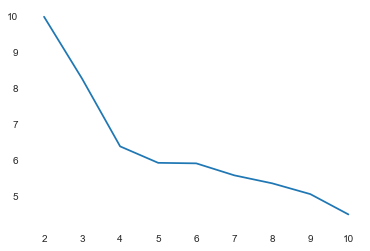

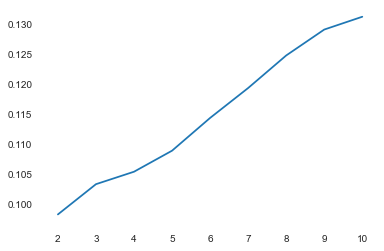

In [59]:
k_select(X_scale,y)

#### Nhận xét: Chọn K = 2 cho thuật toán KNN

### Thuật toán SVR

Chọn bậc cho thuật toán SVR

In [60]:
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import math
import matplotlib.pyplot as plt 

def degree_select(X_scale,y):
    lst_degree = []
    lst_acc = []
    lst_abs_train_test = []
    lst_error = []
    lst_test_score = []
    X_train,X_test,y_train,y_test = train_test_split(X_scale,y,random_state=42)
    for degree in range(1,6):
        lst_degree.append(degree)
        
        model = SVR(kernel='poly',degree=degree)
        model.fit(X_train,y_train)

        y_pred = model.predict(X_test)

        score_train = model.score(X_train,y_train)*100
        score_test = model.score(X_test,y_test)*100
        abs_ = abs(score_train - score_test)
        err = mean_absolute_error(y_test,y_pred)

        lst_abs_train_test.append(abs_)
        lst_error.append(err)
        lst_test_score.append(score_test)
        print("With %d accuracy score : %f"%(degree,score_test))
        
    vitri = lst_test_score.index(max(lst_test_score))
    degree = lst_degree[vitri]
    print("Optimal degree is %s with accuracy %f "%(degree,lst_test_score[vitri]))
    plt.plot(lst_degree,lst_abs_train_test)
    plt.show()
    plt.plot(lst_degree,lst_error)
    plt.show()

With 1 accuracy score : 58.366612
With 2 accuracy score : 59.019592
With 3 accuracy score : 68.078164
With 4 accuracy score : 71.093162
With 5 accuracy score : 70.629925
Optimal degree is 4 with accuracy 71.093162 


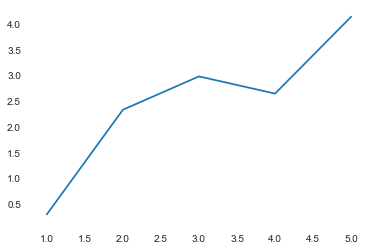

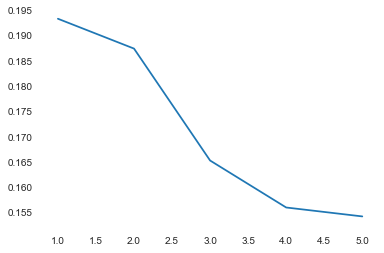

In [61]:
degree_select(X_scale,y)

#### Với thuât toán SVR độ chính xác của model khá thấp

In [62]:
models = [
    LinearRegression(),
    KNeighborsRegressor(n_neighbors=2),
    DecisionTreeRegressor(),
    RandomForestRegressor(n_estimators=200),
    SVR()
]

In [64]:
CV = 10
entries = []
for model in models:
    scores_train = []
    scores_test =[]
    abs_train_test_model = []
    list_error = []
    times = []
    for i in range(CV):
        X_train,X_test,y_train,y_test = train_test_split(X_scale,y,test_size=0.3,random_state=0)
        t1 = datetime.now()
        model_name = model.__class__.__name__
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        t2 = datetime.now()
        time = round((t2-t1).microseconds/1000,1)
        
        train = model.score(X_train,y_train)
        test = model.score(X_test,y_test)
        score = abs(train - test)
        error = mean_absolute_error(y_test,y_pred)
        
        scores_train.append(train)
        scores_test.append(test)
        abs_train_test_model.append(score)
        times.append(time)
        list_error.append(error)
    entries.append([model_name,np.array(scores_train).mean(),np.array(scores_test).mean(),np.array(abs_train_test_model).mean(),np.array(times).mean(),np.array(list_error).mean()])
cv_df = pd.DataFrame(entries,columns = ['model_name','score_train_mean','score_test_mean','|score_train - score_test|','time_mean','error_mean'])

In [66]:
cv_df

model_name  score_train_mean  score_test_mean  \
0       LinearRegression              0.60             0.58   
1    KNeighborsRegressor              0.97             0.85   
2  DecisionTreeRegressor              1.00             0.82   
3  RandomForestRegressor              0.99             0.90   
4                    SVR              0.74             0.71   

   |score_train - score_test|  time_mean  error_mean  
0                        0.01     140.40        0.20  
1                        0.12     744.03        0.10  
2                        0.18     456.79        0.11  
3                        0.09     491.86        0.09  
4                        0.03     463.31        0.15

#### Theo như bản kết quả trên, quyết định chọn thuật toán RandomForestRegressor vì các lý do sau:
* Độ chính xác cao nhất 
* MAE thấp nhất
* Thời gian thực hiện tương đối thấp

### Cross Validation

In [67]:
test_size = [0.2,0.25,0.3]
for i in (test_size):
    X_train,X_test,y_train,y_test = train_test_split(X_scale,y,test_size=i)
    clf = RandomForestRegressor()
    clf.fit(X_train,y_train)
    
    print("with [",1-i,':',i,"],score train is",round(clf.score(X_train,y_train),2),"score test is",round(clf.score(X_test,y_test),2),"difference is",abs(round(clf.score(X_train,y_train) - clf.score(X_test,y_test),2)))

with [ 0.8 : 0.2 ],score train is 0.99 score test is 0.91 difference is 0.07
with [ 0.75 : 0.25 ],score train is 0.99 score test is 0.9 difference is 0.09
with [ 0.7 : 0.3 ],score train is 0.99 score test is 0.9 difference is 0.08


Nhận xét : chọn test_size = 0.2

### Select Feature

In [44]:
from sklearn.feature_selection import SelectKBest,f_classif

In [45]:
bestfeature = SelectKBest(score_func=f_classif,k = 'all')

In [46]:
bestfeature.fit(X_train_scale,y_train)

SelectKBest(k='all')

In [48]:
dfscores = pd.DataFrame(bestfeature.scores_)
dfcolumns = pd.DataFrame(X_train_scale.columns)

In [49]:
feature_score = pd.concat([dfcolumns,dfscores],axis = 1)
feature_score.columns = ['Feature','Score']

In [50]:
feature_score.sort_values(by = 'Score',ascending=False)

Feature  Score
5                     type_new  38.53
39        region_PhoenixTucson   8.49
48         region_SanFrancisco   7.01
23  region_HartfordSpringfield   6.16
24              region_Houston   3.26
0                 Total Volume   3.09
59     region_WestTexNewMexico   2.70
1                   Total Bags   2.57
3                        Month   2.46
17        region_DallasFtWorth   2.43
2                         year   2.37
34              region_NewYork   2.26
46           region_Sacramento   2.19
43    region_RaleighGreensboro   2.09
53              region_Spokane   1.96
51         region_SouthCentral   1.91
15     region_CincinnatiDayton   1.76
27             region_LasVegas   1.65
49              region_Seattle   1.59
42             region_Portland   1.57
40           region_Pittsburgh   1.55
11     region_BuffaloRochester   1.53
13            region_Charlotte   1.46
9                 region_Boise   1.39
58                 region_West   1.39
28           region_LosAngeles   1.37
35            region_Northeast   1.33
10               region_Boston   1.33
30    region_MiamiFtLauderdale   1.27
38         region_Philadelphia   1.26
8   region_BaltimoreWashington   1.26
14              region_Chicago   1.26
7               region_Atlanta   1.22
54              region_StLouis   1.21
47             region_SanDiego   1.21
55             region_Syracuse   1.20
32            region_Nashville   1.18
26         region_Jacksonville   1.17
56                region_Tampa   1.16
41               region_Plains   1.11
33     region_NewOrleansMobile   1.07
6                region_Albany   1.06
36   region_NorthernNewEngland   1.05
22   region_HarrisburgScranton   1.04
16             region_Columbus   1.03
4                       Season   1.03
37              region_Orlando   0.97
19              region_Detroit   0.96
18               region_Denver   0.96
20          region_GrandRapids   0.91
31             region_Midsouth   0.91
45              region_Roanoke   0.85
29           region_Louisville   0.82
52            region_Southeast   0.76
44      region_RichmondNorfolk   0.75
21           region_GreatLakes   0.71
12           region_California   0.70
57              region_TotalUS   0.69
50        region_SouthCarolina   0.65
25         region_Indianapolis   0.61

#### Nhận xét : Các thuộc tính không có tầm quan trọng không chênh lệch nhau nhiều ==> Không bỏ thuộc tính nào